In [1]:
import pandas as pd
import requests
from io import BytesIO

In [2]:
df_hdi = pd.read_csv("raw_hdi.csv")

df_hdi.head(3)

,iso3,country,hdicode,region,hdi_rank_2022,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,...,pop_total_2013,pop_total_2014,pop_total_2015,pop_total_2016,pop_total_2017,pop_total_2018,pop_total_2019,pop_total_2020,pop_total_2021,pop_total_2022
0,AFG,Afghanistan,Low,SA,182.0,0.284,0.292,0.299,0.307,0.300,...,31.541208,32.716210,33.753499,34.636207,35.643417,36.686784,37.769498,38.972231,40.099462,41.128771
1,ALB,Albania,High,ECA,74.0,0.649,0.632,0.616,0.618,0.623,...,2.887014,2.884102,2.882480,2.881063,2.879355,2.877013,2.873883,2.866849,2.854710,2.842321
2,DZA,Algeria,High,AS,93.0,0.593,0.596,0.601,0.602,0.603,...,38.000627,38.760168,39.543154,40.339329,41.136546,41.927007,42.705368,43.451666,44.177968,44.903225


In [3]:
col_name = "le_1990"
col_index = df_hdi.columns.get_loc(col_name)
df_hdi = df_hdi.iloc[:, :col_index] # Keep all columns to the *left* of 'col_name'
df_hdi.head(3)

,iso3,country,hdicode,region,hdi_rank_2022,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,...,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021,hdi_2022
0,AFG,Afghanistan,Low,SA,182.0,0.284,0.292,0.299,0.307,0.300,...,0.475,0.480,0.479,0.483,0.485,0.486,0.492,0.488,0.473,0.462
1,ALB,Albania,High,ECA,74.0,0.649,0.632,0.616,0.618,0.623,...,0.793,0.797,0.797,0.795,0.796,0.797,0.800,0.784,0.785,0.789
2,DZA,Algeria,High,AS,93.0,0.593,0.596,0.601,0.602,0.603,...,0.729,0.732,0.736,0.738,0.738,0.740,0.742,0.730,0.740,0.745


In [4]:
df_hdi[df_hdi['hdi_rank_2022'].isna()] #check rows without hdi_rank_2022

,iso3,country,hdicode,region,hdi_rank_2022,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,...,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021,hdi_2022
90,PRK,Korea (Democratic People's Rep. of),NaN,EAP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,MCO,Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,ZZA.VHHD,Very high human development,NaN,NaN,NaN,0.785,0.788,0.791,0.793,0.798,...,0.882,0.886,0.889,0.892,0.895,0.898,0.901,0.895,0.896,0.902
196,ZZB.HHD,High human development,NaN,NaN,NaN,0.560,0.565,0.570,0.576,0.581,...,0.724,0.731,0.736,0.742,0.748,0.754,0.760,0.759,0.760,0.764
197,ZZC.MHD,Medium human development,NaN,NaN,NaN,0.443,0.446,0.451,0.455,0.460,...,0.599,0.607,0.615,0.624,0.630,0.632,0.635,0.634,0.630,0.640
198,ZZD.LHD,Low human development,NaN,NaN,NaN,0.354,0.356,0.359,0.362,0.366,...,0.489,0.496,0.501,0.506,0.509,0.512,0.516,0.515,0.515,0.517
199,ZZE.AS,Arab States,NaN,NaN,NaN,0.550,0.555,0.561,0.570,0.579,...,0.683,0.686,0.691,0.695,0.700,0.704,0.709,0.704,0.704,0.704
200,ZZF.EAP,East Asia and the Pacific,NaN,NaN,NaN,0.507,0.514,0.523,0.533,0.541,...,0.712,0.721,0.728,0.735,0.742,0.749,0.757,0.760,0.761,0.766
201,ZZG.ECA,Europe and Central Asia,NaN,NaN,NaN,0.663,0.660,0.654,0.650,0.646,...,0.773,0.779,0.782,0.787,0.793,0.798,0.802,0.792,0.797,0.802
202,ZZH.LAC,Latin America and the Caribbean,NaN,NaN,NaN,0.637,0.642,0.646,0.650,0.655,...,0.754,0.757,0.758,0.761,0.764,0.766,0.768,0.755,0.754,0.763


In [5]:
df_hdi = df_hdi.dropna(subset=['hdi_rank_2022']) #clean up unnecessary rows

In [6]:
df_hdi[df_hdi['hdi_rank_2022'].isna()] #check again rows without hdi_rank_2022

,iso3,country,hdicode,region,hdi_rank_2022,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,...,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021,hdi_2022


In [7]:
df_hdi = df_hdi.rename(columns = {'iso3' : 'iso'})  #renaming columns
df_hdi = df_hdi.drop(['hdicode', 'region', 'hdi_rank_2022'], axis=1) #drop columns that will not be used
df_hdi.head(3)

,iso,country,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,...,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021,hdi_2022
0,AFG,Afghanistan,0.284,0.292,0.299,0.307,0.300,0.318,0.326,0.330,...,0.475,0.480,0.479,0.483,0.485,0.486,0.492,0.488,0.473,0.462
1,ALB,Albania,0.649,0.632,0.616,0.618,0.623,0.632,0.644,0.641,...,0.793,0.797,0.797,0.795,0.796,0.797,0.800,0.784,0.785,0.789
2,DZA,Algeria,0.593,0.596,0.601,0.602,0.603,0.607,0.618,0.626,...,0.729,0.732,0.736,0.738,0.738,0.740,0.742,0.730,0.740,0.745


In [8]:
df_hdi.isnull().sum()

iso          0
country      0
hdi_1990    51
hdi_1991    51
hdi_1992    51
hdi_1993    51
hdi_1994    51
hdi_1995    40
hdi_1996    40
hdi_1997    40
hdi_1998    40
hdi_1999    35
hdi_2000    17
hdi_2001    17
hdi_2002    16
hdi_2003    14
hdi_2004    12
hdi_2005     5
hdi_2006     5
hdi_2007     4
hdi_2008     4
hdi_2009     4
hdi_2010     2
hdi_2011     1
hdi_2012     1
hdi_2013     1
hdi_2014     1
hdi_2015     1
hdi_2016     1
hdi_2017     1
hdi_2018     1
hdi_2019     1
hdi_2020     1
hdi_2021     1
hdi_2022     0
dtype: int64

<Axes: title={'center': 'Number of Observations per Year'}>

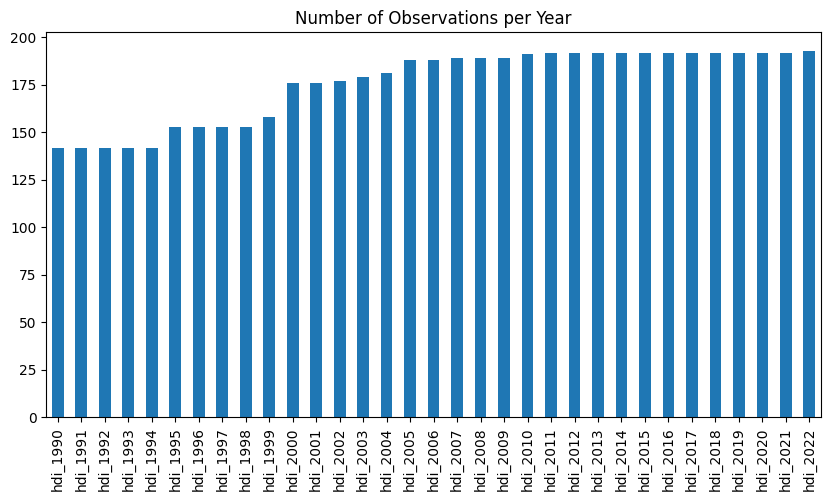

In [9]:
hdi_columns = df_hdi.filter(regex='^hdi_')
hdi_columns.count().plot(kind="bar", figsize=(10, 5), title="Number of Observations per Year")

In [ ]:
# DataFrame and columns are in the format hdi_1990, hdi_1991, ..., hdi_2022
hdi_columns = df_hdi.filter(regex='^hdi_').columns

# Function to get the first non-null value for each row
def get_min_value(row):
    # Find the first non-null value in the row
    first_non_null = row[hdi_columns].first_valid_index()  # First valid (non-null) index
    if pd.notnull(first_non_null):
        return row[first_non_null]  # Return the value at the first non-null index
    return None  # If all values are NaN, return None

# Apply the function to each row and fill NaN values
for index, row in df_hdi.iterrows():
    min_value = get_min_value(row)  # Get the minimum non-null value for the row
    if pd.notnull(min_value):
        # Convert columns to numeric (just in case they are objects) before filling NaNs
        df_hdi.loc[index, hdi_columns] = row[hdi_columns].apply(pd.to_numeric, errors='coerce').fillna(min_value)

# Now df_hdi will have NaN values filled with the first non-null value for each row

df_hdi.head(3)

,iso,country,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,...,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021,hdi_2022
0,AFG,Afghanistan,0.284,0.292,0.299,0.307,0.300,0.318,0.326,0.330,...,0.475,0.480,0.479,0.483,0.485,0.486,0.492,0.488,0.473,0.462
1,ALB,Albania,0.649,0.632,0.616,0.618,0.623,0.632,0.644,0.641,...,0.793,0.797,0.797,0.795,0.796,0.797,0.800,0.784,0.785,0.789
2,DZA,Algeria,0.593,0.596,0.601,0.602,0.603,0.607,0.618,0.626,...,0.729,0.732,0.736,0.738,0.738,0.740,0.742,0.730,0.740,0.745


In [11]:
# Since hdi 2023, 2024, 2025 atre not available, assume last available hdi
df_hdi['hdi_2023'] = df_hdi['hdi_2022']
df_hdi['hdi_2024'] = df_hdi['hdi_2022']
df_hdi['hdi_2025'] = df_hdi['hdi_2022']

In [12]:
df_hdi.isnull().sum()

iso         0
country     0
hdi_1990    0
hdi_1991    0
hdi_1992    0
hdi_1993    0
hdi_1994    0
hdi_1995    0
hdi_1996    0
hdi_1997    0
hdi_1998    0
hdi_1999    0
hdi_2000    0
hdi_2001    0
hdi_2002    0
hdi_2003    0
hdi_2004    0
hdi_2005    0
hdi_2006    0
hdi_2007    0
hdi_2008    0
hdi_2009    0
hdi_2010    0
hdi_2011    0
hdi_2012    0
hdi_2013    0
hdi_2014    0
hdi_2015    0
hdi_2016    0
hdi_2017    0
hdi_2018    0
hdi_2019    0
hdi_2020    0
hdi_2021    0
hdi_2022    0
hdi_2023    0
hdi_2024    0
hdi_2025    0
dtype: int64

<Axes: title={'center': 'Number of Observations per Year'}>

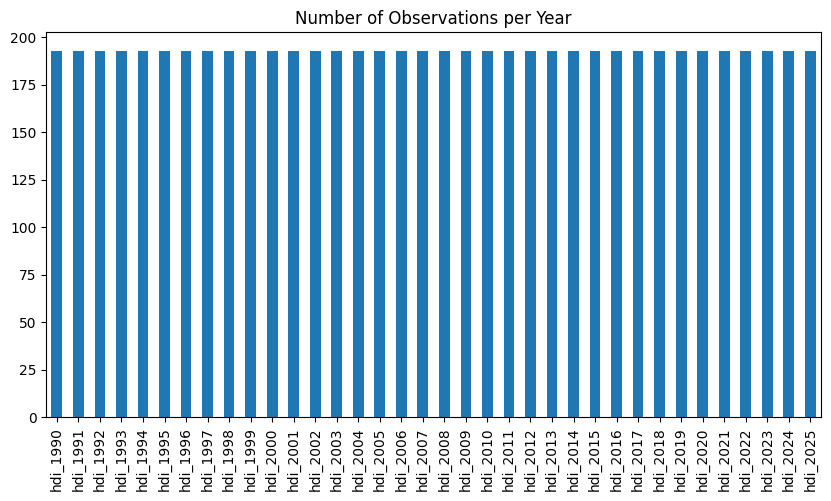

In [13]:
hdi_columns = df_hdi.filter(regex='^hdi_')
hdi_columns.count().plot(kind="bar", figsize=(10, 5), title="Number of Observations per Year")

In [14]:
# HDI columns are like hdi_1990 to hdi_2022
hdi_columns = df_hdi.filter(regex='^hdi_').columns

# Melt the DataFrame
df_hdi = df_hdi.melt(
    id_vars=[col for col in df_hdi.columns if col not in hdi_columns],
    value_vars=hdi_columns,
    var_name="year",
    value_name="HDI"
)

# Clean the 'year' column by removing the "hdi_" prefix and converting to int
df_hdi['year'] = df_hdi['year'].str.replace("hdi_", "").astype(int)

df_hdi.head()

,iso,country,year,HDI
0,AFG,Afghanistan,1990,0.284
1,ALB,Albania,1990,0.649
2,DZA,Algeria,1990,0.593
3,AND,Andorra,1990,0.815
4,AGO,Angola,1990,0.369


In [15]:
df_hdi.shape

(6948, 4)

In [16]:
num_duplicates = df_hdi.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [17]:
df_hdi["year"].value_counts().min(), df_hdi["year"].value_counts().max()

(np.int64(193), np.int64(193))

<Axes: title={'center': 'Number of Observations per Year'}, xlabel='year'>

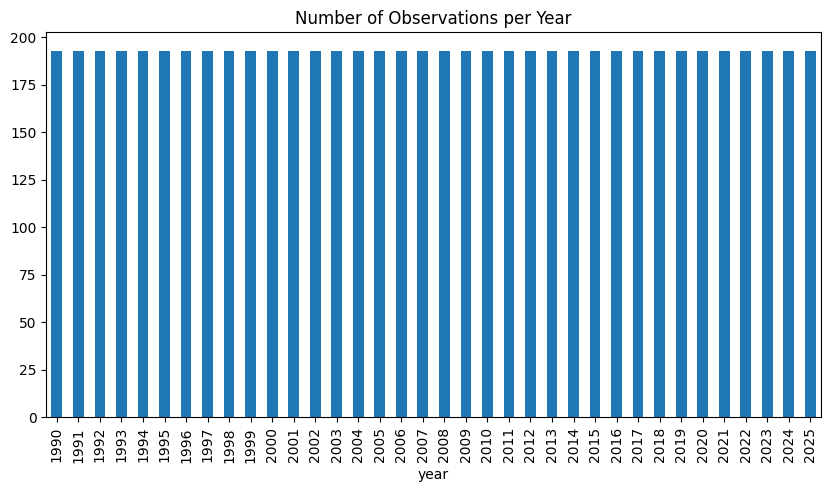

In [18]:
df_hdi["year"].value_counts().sort_index().plot(kind="bar", figsize=(10, 5), title="Number of Observations per Year")

In [19]:
df_hdi.country.value_counts().min(), df_hdi.country.value_counts().max()

(np.int64(36), np.int64(36))

In [20]:
df_hdi.to_csv("cleaned_hdi.csv", index=False)